# Multivariable Calculus

### Goals
Visualize and analyze multivariable functions.

### Requirements
- python
- numpy
- matplotlib

In [2]:
# first let's load the required packages
#
# NOTE: recall that in the Intro to Python workshop we learned
# that you can assign aliases to package names so you don't
# have to type as much (e.g. "np" for "numpy")
#

# numpy for vector operations
import numpy as np

# matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm                # colormaps (for 3D plots)

## 1. Simple Example
Let's first consider the simple function of two variables:

$f(x, y) = 4(x - 1.12)^2 + (y+3.23)^2$

Recall, we were able to represent functions of one variable as a vector indexed by the function's variable. Now that we have two variables, we can represent the function in code using a *matrix*, which we can then visualize with a surface plot.

### 1.1 Visualization

In [3]:
# We first need to choose the range of values for x and y over
# which we will populate the matrix.
#
# Let's look at f(x,y) for x and y between -5 and 5 at increments of 0.5
#
# NOTE: We will modify these later!
#

x_min = -5
x_max = 5
dx = 0.5

y_min = -5
y_max = 5
dy = 0.5

# create the vectors for x and y
x = np.arange(x_min, x_max + dx, dx)
y = np.arange(y_min, y_max + dx, dx)

# create an empty matrix (2D) with all zero values
f = np.zeros([len(x), len(y)])

# loop through the rows and columns of the empty matrix,
# replacing the values using the x and y vectors we defined
# above
#

# loop through the rows
for i in range(len(x)):
    
    # loop through the columns
    for j in range(len(y)):
        
        # Note that the matrix is indexed by integers
        # We need to find the x and y values that correspond with the index in the matrix
        x_i = x[i]
        y_j = y[j]
        
        # NOTE: we will use y values to index rows and x values
        # to index columns so that the plots show the x values
        # go left-to-right while y values go down-to-up
        #
        f[j, i] = 4 * ((x_i - 1.12)**2) + ((y_j + 3.23)**2)

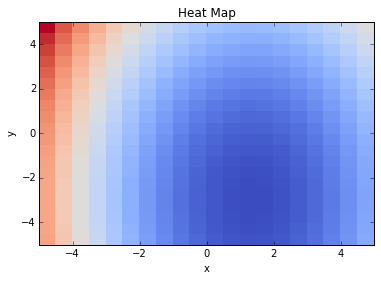

In [5]:
# Next, we represent the function with a heat map and 3-D surface plot

# initialize the figure that will show the heat map
fig, ax = plt.subplots(1, 1)

# plot the heatmap
ax.pcolor(x, y, f, cmap=cm.coolwarm)

# label the figure
ax.set_title('Heat Map')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the figure x-axis and y-axis ranges
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

plt.show()

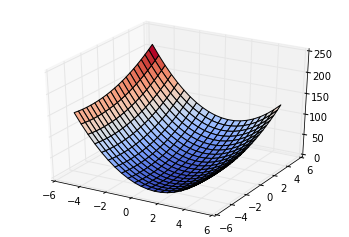

In [6]:
# now initialize the figure that will show a 3D surface plot
fig = plt.figure()
ax = plt.gca(projection='3d')

# convert the data into a format that can be plotted on
# a 3D surface plot
x_mesh, y_mesh = np.meshgrid(x, y)

# plot the data as a surface plot
ax.plot_surface(x_mesh, y_mesh, f,
                
                # set the colormap
                cmap=cm.coolwarm,
                
                # set the resolution of the plotted grid
                rstride=1, cstride=1)

# add labels to the figures


# set the x-axis and y-axis range


plt.show()

Now try creating your own function of two variables. All you need to do is set the x and y limits and step sizes and then the value of the function at each x and y (everywhere there is a blank ___), the rest is done for you! (Note: every variable here has a 2 after (x_min2, x_max2, etc.), this is because we are going to use the function created above in the next steps and don't want to overwrite it)

In [ ]:
# Set the min max and step size
#x_min2 = ___
#x_max2 = ___
#dx2 = ___
#y_min2 = ___
#y_max2 = ___
#dy2 = ___

# Loops to create the function
x2 = np.arange(x_min2, x_max2 + dx2, dx2)
y2 = np.arange(y_min2, y_max2 + dx2, dx2)
f2 = np.zeros([len(x2), len(y2)])
for i in range(len(x2)):
    for j in range(len(y2)):
        x_i2 = x2[i]
        y_j2 = y2[j]
        # Set the value of f(x,y) (i.e. f2[j,i] = x_i2 + y_j2 <--> f(x,y) = x + y)
        #f2[j, i] = ___  
    
# Plots
# Heat Map
fig, ax = plt.subplots(1, 1)
ax.pcolor(x2, y2, f2, cmap=cm.coolwarm)
ax.set_xlim([x_min2, x_max2])
ax.set_ylim([y_min2, y_max2])
plt.show()
# Surface
fig = plt.figure()
ax = plt.gca(projection='3d')
x_mesh2, y_mesh2 = np.meshgrid(x2, y2)
ax.plot_surface(x_mesh2, y_mesh2, f2,
                cmap=cm.coolwarm,
                rstride=1, cstride=1)
plt.show()

### 1.2 Minimum and Maximum

Let's compare the minimum and maximum of the function analytically vs numerically.

Recall that we can find the minimum or maximum of a function with two variables by taking the partial derivatives and setting them both equal to zero. For this example function, we find the minimum as follows:

$$
\frac{\partial f(x,y)}{\partial x} = 8(x-1.12) = 0 \Rightarrow x = 1.12 \\
\frac{\partial f(x,y)}{\partial y} = 2(y+3.23) = 0 \Rightarrow y = -3.23 \\
$$

As this example is very simple, you probably already knew the minimum as at $(x , y) = (1.12, -3.23)$ by inspection.


**Note:** we would have to do the second derivative test to show that those values are a minimum, not a maximum. However, it is pretty clear that in this case we can skip the test. Considering this is the only pair of values for which *both* partial derivatives equal zero, we can conclude that there is no maximum point, i.e. the maximum value of $f(x,y)$ is $\infty$.

Now let's move onto finding the minimum programmatically.

In [9]:
# We start by making guesses of min and max values
min_x = 0
min_y = 0
max_x = 0
max_y = 0
min_val = f[0, 0]
max_val = f[0, 0]

# Then we check all values of f and see if a new min or max is found!
for i in range(len(x)):
    
    for j in range(len(y)):
        
        # current value
        current = f[j, i]
        
        # check if the value is a maximum
        if current > max_val:
            max_val = current
            max_x = x[i]
            max_y = y[j]
            
        # check if the value is a minimum
        if current < min_val:
            min_val = current
            min_x = x[i]
            min_y = y[j]

            
# display the results for the minimum
print "The minimum value of f(x, y) is", min_val

print "The minimum of f(x, y) is found at x =", min_x, ", y =", min_y

# display the results for the maximum
print "The maximum value of f(x, y) is", max_val

print "The maximum of f(x, y) is found at x =", max_x, ", y =", max_y

The minimum value of f(x, y) is 0.1105
The minimum of f(x, y) is found at x = 1.0 , y = -3.0
The maximum value of f(x, y) is 217.5505
The maximum of f(x, y) is found at x = -5.0 , y = 5.0


#### Discussion
What do we see?
- The minimum value and minimum points are not quite right. This is because we were only checking for $x$ and $y$ values used to populate the matrix. Therefore, it makes sense that we only be able to get the right points rounded to the nearest 0.5. While $(x, y)=(1, -3)$ is not the exact point of the minimum, the value we have for $f(1, -3)$ is accurate, thus we find a minimum value that is not exactly zero.
- We found a maximum value. Despite there not being a true maximum value, we found one. This is because we were looking over a limited range of $x$ and $y$. This is an important consideration. What if our minimum was at the boundary of the considered points? Maybe there is a lower point somewhere outside of the set of points we considered.

#### Question
- What would we have to change above to make this method return the exact minimum point and minimum value?

### 1.3 Slope at a point
To find the slope at a point, we plug the values into the partial derivatives to get the slope in the $x$ or $y$ dimension.  We see that $\frac{\partial f}{\partial x}$ is only a function of $x$, so for a given $x$, the slope in the $x$-dimension is the same for any value of $y$, and vice versa.

For example, let's consider the point $(x,y) = (1, 2)$. We get:

$$
\frac{\partial f(1,2)}{\partial x} = 8(1-1.12) = -0.96 \\
\frac{\partial f(1,2)}{\partial y} = 2(2+3.23) = 10.46 
$$

This makes sense, because the $1$ is smaller than the value of $x$ that minimizes $f(x,y)$, so at $x=1$, we would see $f(x,y)$ get **smaller** as $x$ increases. On the other hand, $2$ is significantly larger than $-3.23$, so $f(x, y)$ is rising rapidly in the $y$-dimension as $y$ increases.

In [10]:
# Need to figure out indices:
# -5 + 0.5 * i = 1 ==> i = 12
# -5 + 0.5 * j = 2 ==> j = 14
i = 12
j = 14

# calculate the slopes
dfdx = f[j, i+1] - f[j, i-1]
dfdy = f[j+1, i] - f[j-1, i]

# display the results: x-dimension
print "Slope in the x-dimension at (1,2) is", dfdx

# display the results: y-dimension
print "Slope in the x-dimension at (1,2) is", dfdy


Slope in the x-dimension at (1,2) is -0.96
Slope in the x-dimension at (1,2) is 10.46


#### Discussion
What do we see?
- We got it exactly right! Why? Both $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ are *linear* functions. This means that the slope changes at a constant rate. Thus, when we average the slope on either side of the point in question, it is correct.
- If the partials were not linear functions, this method would NOT yield the correct results, but could still serve as an approximation.
- If we were checking a point that did not fall on an even .0 or .5, we would run into the same issues we did when looking for a min/max.

#### Question
- What is an example of a function where the slope is non-linear?

### 1.4 Volume under the surface
For functions of one variable, we find the area under the curve using the integral. Thus, to find the volume under a surface, we need a double-integral.


Using Wolfram-Alpha for intermediate steps, we integrate $f(x, y)$ twice to find the volume:

$$
\begin{align}
\textrm{Volume}
&= \int_{-5}^{5} \int_{-5}^{5} f(x, y) \ dx \ dy \\
&= \int_{-5}^{5} \int_{-5}^{5} 4(x - 1.12)^2 + (y+3.23)^2 \ dx \ dy \\
&= \int_{-5}^{5} [1.33x^3-4.48x^2+5.02x+x(y+3.23)^2 ]_{x=-5}^{x=5} \ dy \\
&= \int_{-5}^{5} 383.51 + 10(y+3.23)^2 \ dy \\
&= [3.33y^3+32.3y^2+487.84y ]_{y=-5}^{y=5}\\
&= 5711.71
\end{align}
$$

In [11]:
# now let's calculate the volume numerically/programmatically

# Note that because the x and y values are incremented by 0.5, there are FOUR
# values per each 1 square unit. Thus we need to divide the total by 4 to get
# our volume estimate

volume = f.sum() / 4.0

print "The volume under the surface given by f(x, y) is", volume

The volume under the surface given by f(x, y) is 6756.542625


#### Discussion
What do we see?
- The estimate is not very good. Remember, integrals look at infinitesimally small portions of the surface at a time. What we are doing is estimating the integral by looking at the volume under a $0.5 \times 0.5 \ units^2$ portion of the surface at a time. As a result, the estimate is sometimes too big and sometimes too small. In this case, we see that our esimate is moreso an overestimator, yielding a less than reliable result!

#### Question
- What do you think would happen if the ranges for $x$ and $y$ we considered were perfectly centered around the minimum point? Why?

### 1.5 Conclusions
- It is important to be aware of the difference between computational and analytical solutions! Depending on the nature of the problem, certain methods will work better. Depending on the application, different levels of accuracy are required, so just make sure to understand the tradeoffs.
- The methods used above are very basic approaches to help build intuition. There may be existing packages that can give much better solutions. It is always good to see what has already been done to save time and improve accuracy!
- Don't forget, the above computations were just examples. This is not meant to show that we can always get the slope exactly right but not the volume under the curve. Different examples may have different results.

## 2. Two-Link Robot
Before running the next section, we have to **restart the Python kernel**. Restarting the kernel will "clear" the Python plot settings used in the examples above and allow the animation code below to be properly displayed.

To restart the kernely, use the iPython menu bar at the top: Kernel >> Restart.

In [17]:
# For this example, we need an extra python file to animate the robot. Fortunately, we can
# load it just like any other Python package.

import sys
sys.path.append("../helpers")
import two_link_robot

Recall the two-link robot shown below:
<img src="../images/robot_diagram.png" height="400" width="400">

where $p_x$ and $p_y$ are the $x$ and $y$ positions of the end of the second link, and $l_1$ and $l_2$ are the lengths of the two links. We recall that both $p_x$ and $p_y$ are given by functions of both $\theta_1$ and $\theta_2$ as follows:

$$
p_x(\theta_1,\theta_2) = l_1 \cos(\theta_1) + l_2 \cos(\theta_1 + \theta_2) \\
p_y(\theta_1,\theta_2) = l_1 \sin(\theta_1) + l_2 \sin(\theta_1 + \theta_2)
$$

Furthermore we define the angles as functions of time. To simplify matters, we will have the time units be samples (we can imagine that the robot would be moving continuously and we are "sampling" its location at time $t$). Using the same fuctions from the example in lecture, we have:

$$
\theta_1 = \alpha(t) = 6t \\
\theta_2 = \beta(t) = -3t
$$

Using the chain rule, we create expressions for the velocity in the $x$ and $y$ directions:

$$
v_x(t) = -6 l_1 \sin(6t) - 3 l_2 \sin(3t) \\
v_y(t) = 6 l_1 \cos(6t) + 3 l_2 \cos(3t)
$$

Recall that $v_x(t) = 0$ for $t = 0,\ 60,\ 120,\ 180, \ldots$. Below is a simple animation of a robot with "motors" that change according to the functions $\alpha(t)$ and $\beta(t)$ above. Watch the animation and identify the points where the end of the robot is not moving along the $x$-dimension.

### 2.1 Visualizing a rotating robot arm

In [2]:
# Example 1: linear

# Parameters:
# - alpha, beta: {'sin', 'linear', 'triangle', 'constant'}
#     The waveshape.
# - f1, f2 : float
#     The frequency in cycles per sample.
# - a1, a2 : float
#     The amplitude in degrees: sin/triangle = max/min degrees, constant = constant angle, linear = no used.
#
    
# the first half of the arm
alpha = 'linear'
f1 = 6.0
a1 = 0.0   # not used for linear alpha, so we set it to 0

# the second half of the arm
beta = 'linear'  
f2 = -3.0
a2 = 0.0   # not used for linear beta, so we set it to 0

# the arm lengths
l1 = 50
l2 = 20

# plot the rotating robot arm
two_link_robot.animate_robot(alpha, a1, f1, beta, a2, f2, l1, l2,trace=True)

Below are more examples of different function choices for $\alpha(t)$ and $\beta(t)$. In these examples the option 'trace' is set to True so that the robot arm leaves a trail at all the points it passes. Take a look at how much it changes just by switching f2 to be positive 3. This causes both arms to rotate in the same direction. Look at the following examples and take note of what is causing certain behaviors or patterns. Modify parameters and see what happens!

In [7]:
# Example 2: linear

alpha = 'linear'
f1 = 6.0
a1 = 0.0

beta = 'sin'  
f2 = 1/90.0
a2 = 180.0

# robot arm lengths
l1 = 50.0
l2 = 20.0

# animate the robot arm
two_link_robot.animate_robot(alpha, a1, f1,
                             beta, a2, f2,
                             l1, l2,
                             trace=True)

In [8]:
# Example 3: triangle

alpha = 'triangle'
f1 = 1.0 / 360.0 # samples per cycle (so every 360 samples the pattern repeats!)
a1 = 360.0

beta = 'triangle'  
f2 = 1.0 / 90.0
a2 = 180.0

# robot arm lengths
l1 = 20.0
l2 = 20.0

# animate the robot arm
two_link_robot.animate_robot(alpha, a1, f1,
                             beta, a2, f2,
                             l1, l2,
                             trace=True)

In [19]:
# Example 4: sinusoidal + triangle

alpha = 'linear'
f1 = 9  # samples per cycle (so every 360 samples the pattern repeats!)
a1 = 360.0

beta = 'tri'  
f2 = 10
a2 = 180.0

# robot arm lengths
l1 = 20.0
l2 = 50.0

# animate the robot arm
two_link_robot.animate_robot(alpha, a1, f1,
                             beta, a2, f2,
                             l1, l2,
                             trace=True)

In [ ]:
# Example 5: sinusoidal

alpha = 'sin'
f1 = 1.0/316
a1 = 34

beta = 'sin'  
f2 = 1.0/40
a2 = 180

# robot arm lengths
l1 = 40.0
l2 = 50.0

# animate the robot arm
two_link_robot.animate_robot(alpha, a1, f1,
                             beta, a2, f2,
                             l1, l2,
                             trace=True)